<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab13_multinomial_classfication_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np

In [7]:
x_data=np.array([1,2,2,3,3,1,4,3,5,3,6,2],np.float32).reshape(6,2)
indices=np.array([0,0,1,1,2,2])

In [8]:
x_data

array([[1., 2.],
       [2., 3.],
       [3., 1.],
       [4., 3.],
       [5., 3.],
       [6., 2.]], dtype=float32)

In [9]:
x_data.shape[1]

2

In [10]:
y_data=tf.one_hot(indices,depth=3)

In [11]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [12]:
input_dim=x_data.shape[1]
units=y_data.shape[1]
print(input_dim,units)

2 3


input(nxi), output(nxj) i는 인풋 갯수 j는 아웃풋 갯수, n데이터 갯수
W와 b의 갯수는? W는 ixj개, [i,j] b는 j개 [1,j]

# Classfication

In [13]:
learning_rate=1e-2

그렇다면 w와 b의 사이즈를 어떻게 정하는가? 일일이 i와 j의 크기를 넣어줘야 하나? 아니면 자동으로 정할 수 있는가?
x_data와 y_data의 dimension을 뽑을수 있으면 가능함.
- x_data.shape[숫자] : 해당숫자-1에 해당하는 dimension을 뽑음.

In [18]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [19]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [20]:
b=tf.Variable(b_init(shape=(units,)),dtype='float32')

In [22]:
for i in range(10000):
  # loss
  with tf.GradientTape() as tape:
    z=tf.matmul(x_data,w)+b   #매트릭스 곱하기 : np.matmul()
    hypothesis=tf.nn.softmax(z) #nn.softmax
    loss=-tf.reduce_mean(tf.reduce_sum(y_data*tf.math.log(hypothesis),axis=1)) #axis=1은 행렬안에 가로방향으로 산술계산한다

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 1000==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 1.0496450662612915
iteration 1000 loss 0.46598899364471436
iteration 2000 loss 0.3735344409942627
iteration 3000 loss 0.3206857144832611
iteration 4000 loss 0.28350451588630676
iteration 5000 loss 0.2552579343318939
iteration 6000 loss 0.2328714281320572
iteration 7000 loss 0.214607372879982
iteration 8000 loss 0.1993730068206787
iteration 9000 loss 0.18643657863140106


In [23]:
w.numpy()

array([[-2.7603362,  0.4917461,  2.267821 ],
       [ 2.7391381, -1.0066956, -1.6393824]], dtype=float32)

In [24]:
b.numpy()

array([ 1.278563 ,  2.4279826, -3.7065437], dtype=float32)

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.9538403],
       [0.729815 ]], dtype=float32)>

In [27]:
z=tf.matmul(x_data,w)+b
hypothesis=tf.nn.softmax(z)
hypothesis.numpy()

array([[9.5633501e-01, 4.3507904e-02, 1.5709856e-04],
       [9.7268569e-01, 2.7008278e-02, 3.0596243e-04],
       [6.2780216e-04, 8.0779052e-01, 1.9158170e-01],
       [3.7208252e-02, 6.9005936e-01, 2.7273238e-01],
       [6.2530499e-04, 2.9970944e-01, 6.9966525e-01],
       [7.0716020e-08, 3.7092254e-02, 9.6290767e-01]], dtype=float32)

In [26]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

# subclassing

In [42]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    logits=tf.matmul(inputs,self.w)+self.b
    return tf.nn.softmax(logits)

In [43]:
# loss
loss=tf.keras.losses.CategoricalCrossentropy()   #yes no만 있는 crossentropy

In [44]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [45]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [46]:
# learning
for i in range(10000):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

  if i % 2000==0:
    print('{} {}'.format(i,loss(y_data,model(x_data))))


0 1.0647273063659668
2000 0.37350115180015564
4000 0.2835254967212677
6000 0.23289602994918823
8000 0.19939588010311127


In [47]:
model.w.numpy()

array([[-2.7190106 ,  0.53459585,  2.3103826 ],
       [ 2.7302036 , -1.0226547 , -1.6553111 ]], dtype=float32)

In [48]:
model.b.numpy()

array([ 1.2681359,  2.4326038, -3.700739 ], dtype=float32)

In [49]:
model(x_data)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[9.5622933e-01, 4.3613013e-02, 1.5762879e-04],
       [9.7276443e-01, 2.6930181e-02, 3.0529057e-04],
       [6.1990722e-04, 8.0774277e-01, 1.9163729e-01],
       [3.7204456e-02, 6.9003832e-01, 2.7275723e-01],
       [6.2438147e-04, 2.9974470e-01, 6.9963098e-01],
       [7.0035014e-08, 3.7109576e-02, 9.6289033e-01]], dtype=float32)>

In [50]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

# Sequential model

In [51]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,activation='softmax',kernel_initializer='random_normal'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


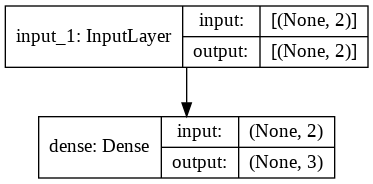

In [53]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [54]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.CategoricalCrossentropy())

In [55]:
# learning
model.fit(x_data,y_data,epochs=10000,verbose=0)

In [57]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 17ms/step - loss: 0.1753


0.17533636093139648

In [58]:
model.get_weights()

[array([[-2.7677085 ,  0.48500085,  2.2606063 ],
        [ 2.7150738 , -1.0344605 , -1.6670495 ]], dtype=float32),
 array([ 1.272362 ,  2.4301713, -3.7025409], dtype=float32)]

In [59]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [60]:
model.predict(x_data)

array([[9.5626730e-01, 4.3575164e-02, 1.5758394e-04],
       [9.7272408e-01, 2.6969999e-02, 3.0588583e-04],
       [6.2363315e-04, 8.0771583e-01, 1.9166051e-01],
       [3.7213221e-02, 6.9001102e-01, 2.7277577e-01],
       [6.2514504e-04, 2.9975986e-01, 6.9961500e-01],
       [7.0435526e-08, 3.7121069e-02, 9.6287882e-01]], dtype=float32)